In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('data.csv')

In [5]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
## Dropped unnecessary columns

data.drop(['id'],axis=1,inplace=True)

In [7]:
## Converted Heat_disease and hypertension in yes or no format.

data['hypertension'] = data['hypertension'].map({0:'No',1:'Yes'})
data['heart_disease'] = data['heart_disease'].map({0:'No',1:'Yes'})

In [8]:
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,No,Yes,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,No,No,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,No,Yes,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,No,No,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,Yes,No,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [9]:
## List of All Categorical Columns

categorical_col = ['gender','hypertension','heart_disease','ever_married', 'work_type','Residence_type','smoking_status']

In [10]:
## More Info About Categorical Columns
## Unique variables in Each Categorical Columns and their Frequency

def more_info(data,arr):
    for n, c in enumerate(arr):
        print('Total number of unique values in',arr[n],'columns is',data[c].nunique(),'Its Unique values are',data[c].unique())
        print(data[c].value_counts())
        print('*'*100)

In [11]:
more_info(data,categorical_col)

Total number of unique values in gender columns is 3 Its Unique values are ['Male' 'Female' 'Other']
Female    2994
Male      2115
Other        1
Name: gender, dtype: int64
****************************************************************************************************
Total number of unique values in hypertension columns is 2 Its Unique values are ['No' 'Yes']
No     4612
Yes     498
Name: hypertension, dtype: int64
****************************************************************************************************
Total number of unique values in heart_disease columns is 2 Its Unique values are ['Yes' 'No']
No     4834
Yes     276
Name: heart_disease, dtype: int64
****************************************************************************************************
Total number of unique values in ever_married columns is 2 Its Unique values are ['Yes' 'No']
Yes    3353
No     1757
Name: ever_married, dtype: int64
*********************************************************************

In [12]:
## Info about Numerical Data
## Range, Mean , Standard Deviation of Numerical Columns

def info_about_data(data):
    display('The total rows',data.shape[0], 'The total number of columns ',data.shape[1])
    print("*"*100)
    display('Missing values in the data ',data.isnull().sum())
    print('*'*100)
    display('Descriptive Stat about data', data.describe())

In [13]:
info_about_data(data)

'The total rows'

5110

'The total number of columns '

11

****************************************************************************************************


'Missing values in the data '

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

****************************************************************************************************


'Descriptive Stat about data'

,age,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,106.147677,28.893237,0.048728
std,22.612647,45.283560,7.854067,0.215320
min,0.080000,55.120000,10.300000,0.000000
25%,25.000000,77.245000,23.500000,0.000000
50%,45.000000,91.885000,28.100000,0.000000
75%,61.000000,114.090000,33.100000,0.000000
max,82.000000,271.740000,97.600000,1.000000


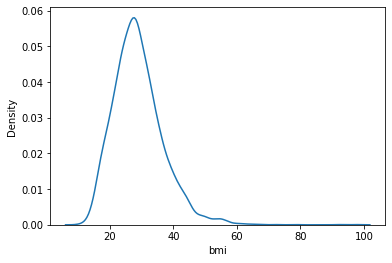

In [14]:
## Dispersion of bmi

sns.kdeplot(data['bmi']);

In [15]:
## Impute the Median( bmi consists many outliers) Values in Place of Missing Values. 

data['bmi'].fillna((data['bmi'].median()), inplace=True)

In [16]:
## Saved copy of a clean Data

data.to_csv('clean_data.csv',index=False) 

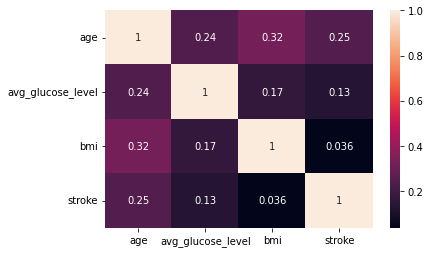

In [17]:
## Correlation between different columns

sns.heatmap(data.corr(), annot=True);

In [18]:
## Encoding Categorical Columns

categorical_col = ['gender','hypertension','heart_disease', 'ever_married', 'work_type','Residence_type','smoking_status']
for col in categorical_col:
    dummy = pd.get_dummies(data[col],prefix=col)
    data = pd.concat([data,dummy],axis=1)
    del data[col]

In [19]:
data.head()

,age,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,hypertension_No,hypertension_Yes,heart_disease_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,228.69,36.6,1,0,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,202.21,28.1,1,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,105.92,32.5,1,0,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,171.23,34.4,1,1,0,0,1,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,174.12,24.0,1,1,0,0,0,1,1,...,0,0,1,0,1,0,0,0,1,0


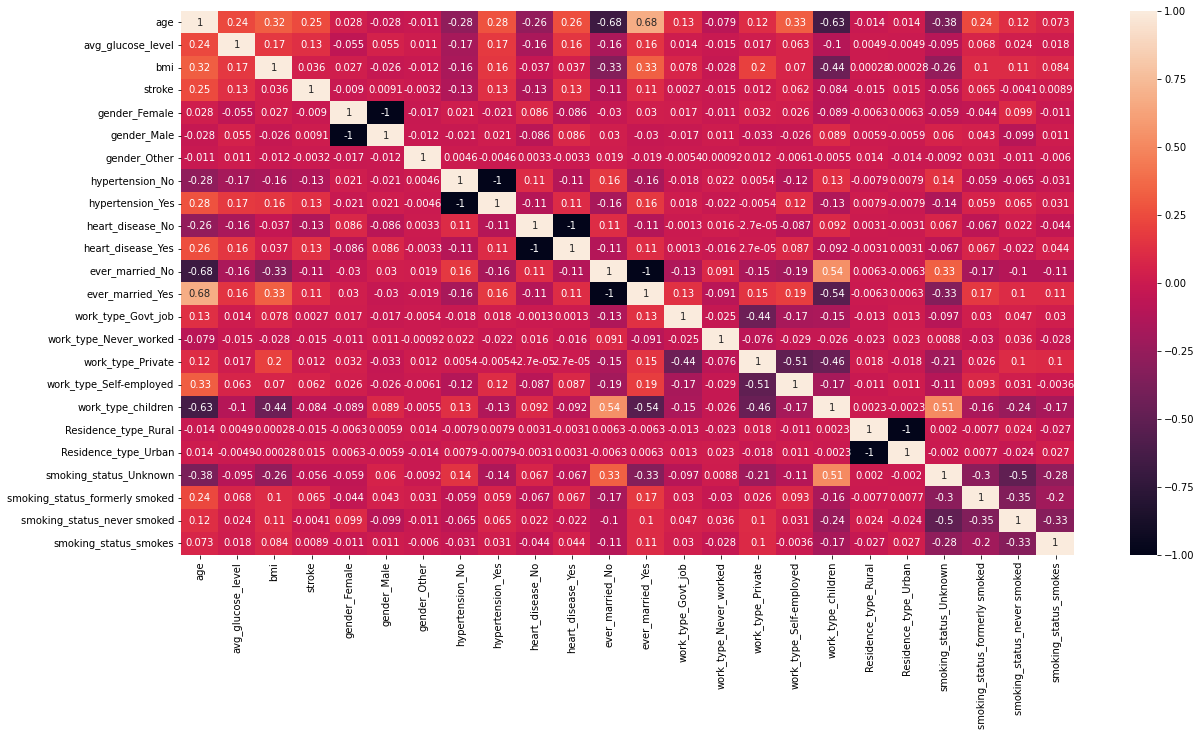

In [20]:
plt.figure(figsize=(20,10))
sns.heatmap(data.corr(),annot=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   age                             5110 non-null   float64
 1   avg_glucose_level               5110 non-null   float64
 2   bmi                             5110 non-null   float64
 3   stroke                          5110 non-null   int64  
 4   gender_Female                   5110 non-null   uint8  
 5   gender_Male                     5110 non-null   uint8  
 6   gender_Other                    5110 non-null   uint8  
 7   hypertension_No                 5110 non-null   uint8  
 8   hypertension_Yes                5110 non-null   uint8  
 9   heart_disease_No                5110 non-null   uint8  
 10  heart_disease_Yes               5110 non-null   uint8  
 11  ever_married_No                 5110 non-null   uint8  
 12  ever_married_Yes                51

In [22]:
## Separate the Dependent Columns from Independent Columns
X = data.drop(['stroke'],axis=1)
y = data['stroke']

In [23]:
data.shape

(5110, 24)

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

## Feature Selection

In [25]:
## Feature Selection

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [26]:
ordered_rank_features = SelectKBest(score_func=chi2,k=21)
ordered_features = ordered_rank_features.fit(X,y)

In [27]:
data_scores = pd.DataFrame(ordered_features.scores_,columns=['Score'])
data_columns = pd.DataFrame(X.columns)

In [28]:
feature_rank = pd.concat([data_columns, data_scores],axis=1)

In [29]:
feature_rank.columns=['Features','Score']
feature_rank.sort_values(by='Score',ascending=False)

,Features,Score
0,age,3635.226911
1,avg_glucose_level,1718.285446
9,heart_disease_Yes,87.987436
7,hypertension_Yes,75.449498
10,ever_married_No,39.355836
16,work_type_children,31.111620
11,ever_married_Yes,20.622787
20,smoking_status_formerly smoked,17.607359
15,work_type_Self-employed,16.584252
2,bmi,13.683435


## Feature Importance

In [30]:
### Feature Importance

from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)

ExtraTreesClassifier()

In [31]:
print(model.feature_importances_)

[2.69127135e-01 2.67505201e-01 2.37592851e-01 1.60627010e-02
 1.52976095e-02 1.57126870e-07 1.04776529e-02 1.06489773e-02
 1.05051316e-02 9.56894664e-03 9.00924052e-03 8.46849880e-03
 1.25095247e-02 3.16623534e-05 1.54802206e-02 1.47555283e-02
 1.00500856e-03 1.60219489e-02 1.73107731e-02 1.26043290e-02
 1.45743765e-02 1.71025684e-02 1.43399571e-02]


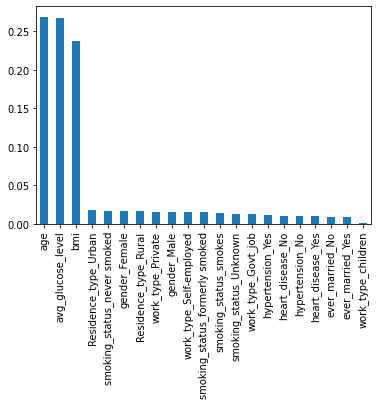

In [32]:
ranked_features = pd.Series(model.feature_importances_,index=X.columns)
ranked_features.nlargest(21).plot(kind='bar')
plt.show()

### Training The Model  :

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [34]:

lr_clf = LogisticRegression()
dtr_clf = DecisionTreeClassifier()
rfr_clf = RandomForestClassifier()
xgb_clf = XGBClassifier()
lgb_clf = LGBMClassifier()


ml_models = [lr_clf, dtr_clf, rfr_clf, xgb_clf, lgb_clf]

In [35]:
best_accuracies = 0.0
best_regressor = 0

model_dict = {0: 'LogisticRegression', 1: 'DecisionTreeRegressor', 2: 'RandomForestRegressor', 3: 'Xgboost', 4: 'LightGBM'}

In [36]:
for model in ml_models:
    model.fit(X_train, y_train)

In [37]:
for i, models in enumerate(ml_models):
    print( model_dict[i], models.score(X_test, y_test)) 

LogisticRegression 0.9393346379647749
DecisionTreeRegressor 0.9099804305283757
RandomForestRegressor 0.9393346379647749
Xgboost 0.9393346379647749
LightGBM 0.9363992172211351


In [38]:
## Classification Metrics

In [39]:
y_pred = lr_clf.predict(X_test) ## Logistic Regression

In [40]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_pred,y_test)
print(cm)
acc_score = accuracy_score(y_pred,y_test)
print(acc_score)

[[960  62]
 [  0   0]]
0.9393346379647749


In [41]:
## Cross Validation Score

from sklearn.model_selection import cross_val_score
crv = cross_val_score(lr_clf,X,y,cv=10)


In [42]:
print('Score after Cross Validation is ',crv.mean())

Score after Cross Validation is  0.9512720156555773


In [43]:
## Stratified K fold Cross Validation

In [44]:
from sklearn.model_selection import StratifiedKFold

In [45]:
accuracy = []
skf = StratifiedKFold(n_splits=5, random_state=None)
skf.get_n_splits(X,y)

for train_index, test_index in skf.split(X,y):
    print('Train',train_index,'Validation',test_index)
    X1_train, X1_test = X.iloc[train_index], X.iloc[test_index]
    y1_train, y1_test = y.iloc[train_index], y.iloc[test_index]
    
    lr_clf.fit(X1_train,y1_train)
    predictions = lr_clf.predict(X1_test)
    score = accuracy_score(predictions,y1_test)
    accuracy.append(score)
    
print(accuracy)

Train [  50   51   52 ... 5107 5108 5109] Validation [   0    1    2 ... 1218 1219 1220]
Train [   0    1    2 ... 5107 5108 5109] Validation [  50   51   52 ... 2190 2191 2192]
Train [   0    1    2 ... 5107 5108 5109] Validation [ 100  101  102 ... 3162 3163 3164]
Train [   0    1    2 ... 5107 5108 5109] Validation [ 150  151  152 ... 4134 4135 4136]
Train [   0    1    2 ... 4134 4135 4136] Validation [ 200  201  202 ... 5107 5108 5109]
[0.9510763209393346, 0.9510763209393346, 0.9510763209393346, 0.9510763209393346, 0.9530332681017613]


In [46]:
print('Score after Stratified Cross Validation is ',np.array(accuracy).mean())

Score after Stratified Cross Validation is  0.9514677103718199


In [47]:
model = lr_clf ## LogisticRegression

In [48]:
import pickle

In [49]:
pickle_out = open("model1.pkl", "wb") 
pickle.dump(model, pickle_out) 
pickle_out.close()